In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('./data/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.drop("PassengerId",axis=1,inplace=True)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

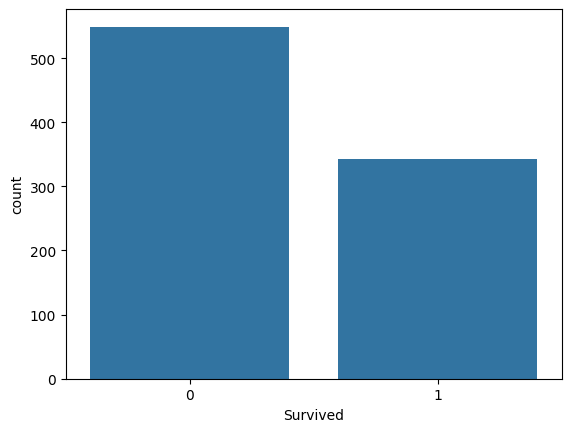

In [6]:
sns.countplot(x='Survived',data=titanic)

<Axes: xlabel='Sex', ylabel='Survived'>

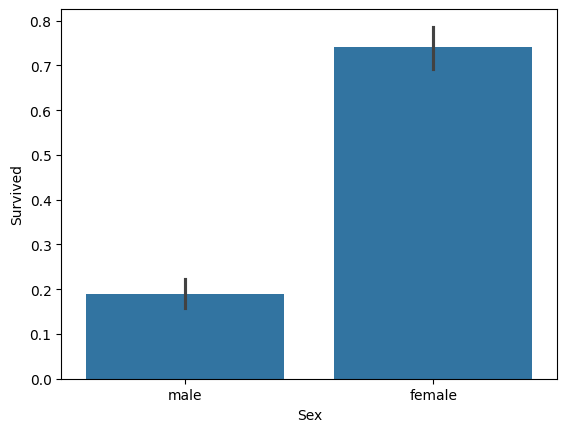

In [7]:
sns.barplot(x='Sex',y='Survived',data=titanic)#barplot主要看平均情况，这里可以看出不同性别的平均生存率

<Axes: xlabel='Embarked', ylabel='Survived'>

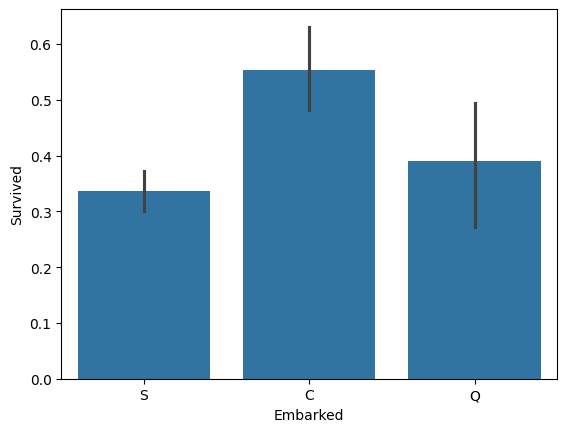

In [8]:
sns.barplot(x='Embarked',y='Survived',data=titanic)#进C港口的生存率相比其它要高，但高不了哪去

<Axes: xlabel='Embarked', ylabel='Survived'>

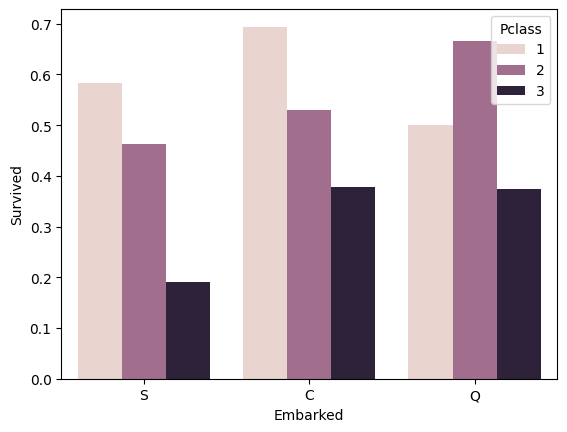

In [9]:
#Embarked的特征不明显，但我们还不能过早做决定说不要它，我们看看Embarked和Pclass是否有联系
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=titanic, errorbar=None)
#很明显C港口的1等座是存活最高的
#Q港口的2等座是存活最高的
#相比于其它三个来说C港口幸存的更好
#其实可以看出，接近C登船口的地方都是作为好的地方，这些地方可能一开始就有一些施救的物品

<Axes: xlabel='Age', ylabel='Count'>

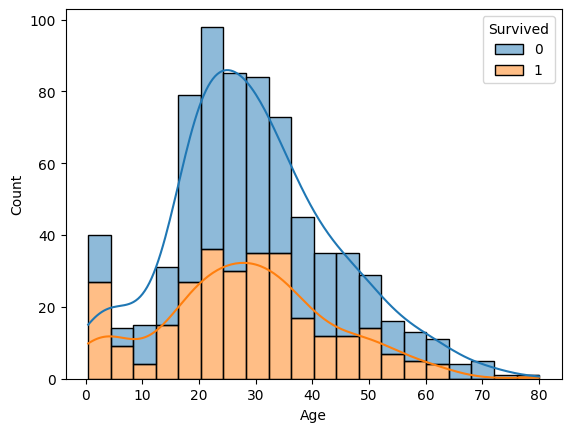

In [10]:
#因为年龄不是分类而是回归连续数据，要在直方图上看，所以用histplot来看
#hue参数表示根据Survived来区分，否则就只是单纯的年龄分布图了
#kde=True是为了表示出那条曲线
sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack', kde=True)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

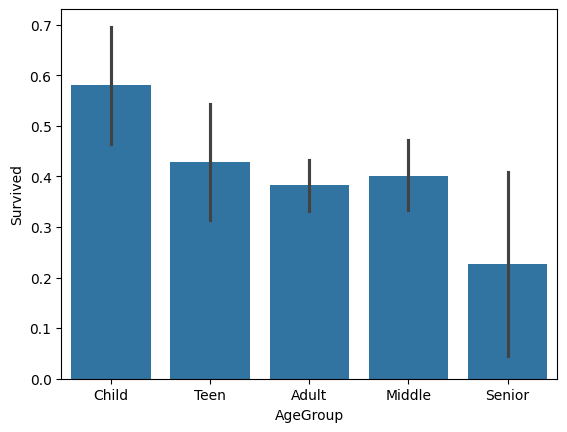

In [11]:
#但上述如果但分析年龄图时，看不到什么好的特征，那么我们可以进行一个eda工程———1.年龄分箱，看不同年龄段的平均存活率。2.看儿童和非儿童的平均存活率
#年龄分箱
titanic['AgeGroup'] = pd.cut(titanic['Age'],bins=[0,12,18,35,60,100],labels=['Child','Teen','Adult','Middle','Senior'])
sns.barplot(x='AgeGroup',y='Survived',data=titanic)

<Axes: xlabel='isChild', ylabel='Survived'>

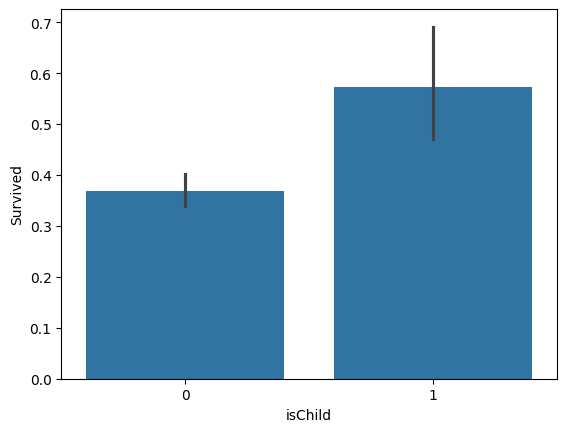

In [12]:
titanic['isChild']=np.where(titanic['Age']<12,1,0)
sns.barplot(x='isChild',y='Survived',data=titanic)

<Axes: xlabel='Fare', ylabel='Count'>

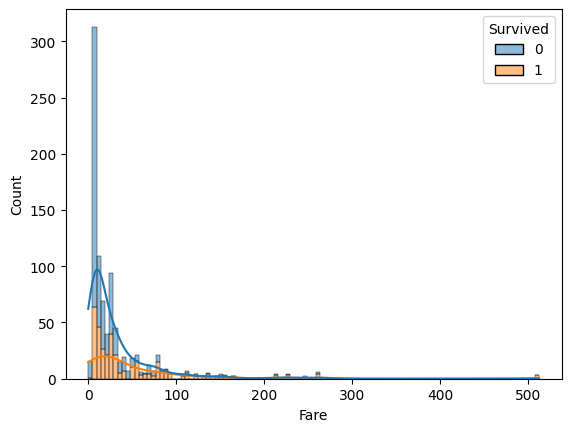

In [13]:
sns.histplot(data=titanic, x='Fare', hue='Survived', multiple='stack', kde=True)
#我们可以看到票价也是决定生存率的一个重要特征，越有钱他的存活率越高

<Axes: xlabel='Pclass', ylabel='Fare'>

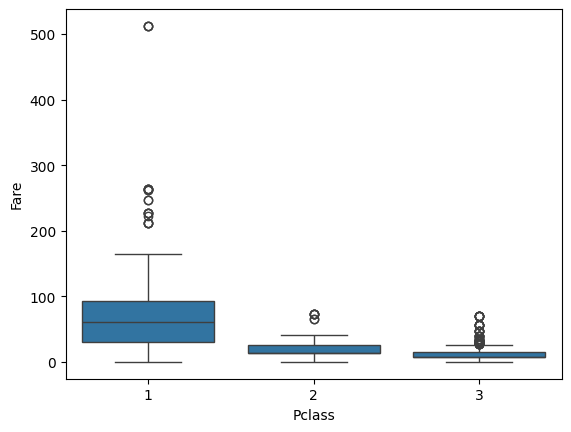

In [14]:
sns.boxplot(x='Pclass', y='Fare', data=titanic)
#这里看出一等座的票价参差不齐

In [15]:
"""
根据上述图像可以知道：
1. 性别是一个预测存活率的重要特征。
2. 年龄也是一个预测存活率的重要特征，儿童明显存活率高。
3. Fare也是一个重要特征，因为Fare高的有钱人明显存活更高。
4. Embarked这个特征我目前只分析出可能C口有更多救生设施或者1号座那边更多间接受到Fare的影响，
   目前对于Embarked的特征还没发现更好的利用吧。不过后面的特征工程分析里，我们会好好分析的。
"""

'\n根据上述图像可以知道：\n1. 性别是一个预测存活率的重要特征。\n2. 年龄也是一个预测存活率的重要特征，儿童明显存活率高。\n3. Fare也是一个重要特征，因为Fare高的有钱人明显存活更高。\n4. Embarked这个特征我目前只分析出可能C口有更多救生设施或者1号座那边更多间接受到Fare的影响，\n   目前对于Embarked的特征还没发现更好的利用吧。不过后面的特征工程分析里，我们会好好分析的。\n'

In [16]:
#接下来针对年龄进行数据清洗，先看看整个数据情况
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
 11  AgeGroup  714 non-null    category
 12  isChild   891 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [17]:
titanic['Title'] = titanic['Name'].str.extract(r' ([A-Za-z]+)\.',expand=False)
print(titanic['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [18]:
# 我们注意到有稀有头衔，我们要将这些稀有头衔转换为常见的头衔，便于我们后面进行年龄划分
# 将一些稀有头衔进行映射归并
title_mapping = {
    'Mlle': 'Miss',    # Mlle（法语小姐） -> Miss
    'Ms': 'Miss',
    'Lady': 'Mrs',     # 贵族妇女 -> Mrs
    'Countess': 'Mrs',
    'Dona': 'Mrs',
    'Mme': 'Mrs',      # Mme（法语夫人） -> Mrs
    'Capt': 'Mr',      # 船长 -> Mr
    'Col': 'Mr',       # 上校 -> Mr
    'Don': 'Mr',       # 先生（西班牙语） -> Mr
    'Dr': 'Mr',        
    'Jonkheer': 'Mr',  # 荷兰贵族 -> Mr
    'Major': 'Mr',
    'Rev': 'Mr',       # 牧师 -> Mr
    'Sir': 'Mr'
}

#启用映射，将那些小众称呼映射到一起
titanic['Title'] = titanic['Title'].map(title_mapping).fillna(titanic['Title'])
#用fillna是为了确保那些没在映射表中的头衔（如Master，Mr）保持不变

print(titanic['Title'].value_counts())

Title
Mr        538
Miss      185
Mrs       128
Master     40
Name: count, dtype: int64


In [19]:
#计算各年龄段的中位数
print(titanic.groupby('Title')['Age'].median())
#这下用各个组的中位数来进行填充，要比直接用整个数据的中位数来填充效果更好了
#以下得到的是Serise序列，即.median()得到的是序列，因此后期可以用.median()['Mr']来访问Mr的中位数

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64


In [20]:
#定义一个函数来进行年龄填充,顺便学习一下pandas中如何运用函数
def fill_age(row):
    #如果是空值
    if pd.isnull(row['Age']):
        #返回中位数,median()返回的是Series，median()[row['Title']]是返回这个称谓年龄段的中位数
        return titanic.groupby('Title')['Age'].median()[row['Title']]
    else:
        #如果不是空值，则返回原数据
        return row['Age']

titanic['Age'] = titanic.apply(fill_age,axis=1)
#年龄的缺口已经填满，那么对应的之前的年龄段仍有空值，我们就可以现在填充了
#以下是pandas提供的分箱代码
titanic['AgeGroup'] = pd.cut(titanic['Age'],bins=[0,12,18,35,60,100],labels=['Child','Teen','Adult','Middle','Senior'])

#验证是否有缺失值,若为空输出应该是0
print(titanic['Age'].isnull().sum())

0


In [21]:
#接下来是针对Embarked进行数据清洗
#由于Embarked缺失很少，只缺了两个，所以最好的是用众数进行填充
print(titanic['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [22]:
#我们发现，登录港口的众数是S，因此我们直接用用S进行填充就行
#可以对pandas数据中的某一个列使用mode()[0]来获取数据最多的值
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

#验证是否填充成功
print(titanic['Embarked'].isnull().sum())

0


C:\Users\汪博艺\AppData\Local\Temp\ipykernel_9112\3015031878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)


In [23]:

"""
我们发现cabin的残缺最多，所以要么我们不要cbin这一项，要么我们要这一项不过要进行特征工程
要或不要，不是我们说的算，要看数据，因此我们看看cabin记录和无记录是否和pclass有关
这里详细说一下代码
crosstab是交叉表
Pclass是x值
不为空的Cabin是y值，由于notnull()返回的是boolean类型，所以我们看到y是True和False
margins是显示总数,如果不写margins=True，那么是不会记录总数的

"""
print(pd.crosstab(titanic['Pclass'],titanic['Cabin'].notnull().rename('Has_Cabin'),margins=True))


Has_Cabin  False  True  All
Pclass                     
1             40   176  216
2            168    16  184
3            479    12  491
All          687   204  891


<Axes: xlabel='HasCabin', ylabel='Survived'>

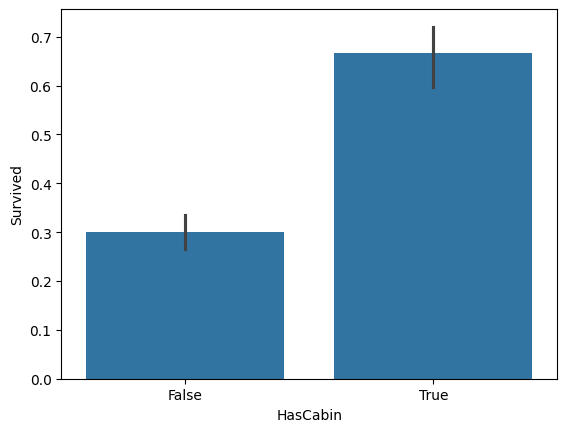

In [24]:
"""
发现，明显等级越高的作为，它舱门记录的更多！等级越低的座位，它舱门记录的越少！
因此我们思考Pclass和Cabin的是否有空值的影响很大，而之前我们看出Fare对survived影响很大，其实Fare也决定了Pclass，因此我们可以建立新特征：“是否记录了Cabin”
或许这个新特征得到的效果很大
再次说明，pandas里对于整列调用函数，它自己会迭代的去执行代码
"""
#创建
titanic['HasCabin'] = titanic['Cabin'].notnull()
sns.barplot(data=titanic,x=titanic['HasCabin'],y=titanic['Survived'])

In [25]:
"""
从上面可以看出，明显有舱门记录的平均存活率要高于没有舱门记录的平均存活率
因此在数据清洗过程中，不要一上来就把缺失值多的特征选择drop，或许它可以抽出一个新的特征
目前经过数据清洗过程中，已经建立了三个特征：'Title'(头衔),'HasCabin','isChild'
那么现在，我们已经弄完数据清洗了（当所有空值通过建立新特征或者fillna后，则完成数据清洗了）
我们要开始进行EDA工程了
EDA工程的话，要求再一次看数据情况
"""

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  891 non-null    object  
 11  AgeGroup  891 non-null    category
 12  isChild   891 non-null    int64   
 13  Title     891 non-null    object  
 14  HasCabin  891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(5), object(6)
memory usage: 92.6+ KB


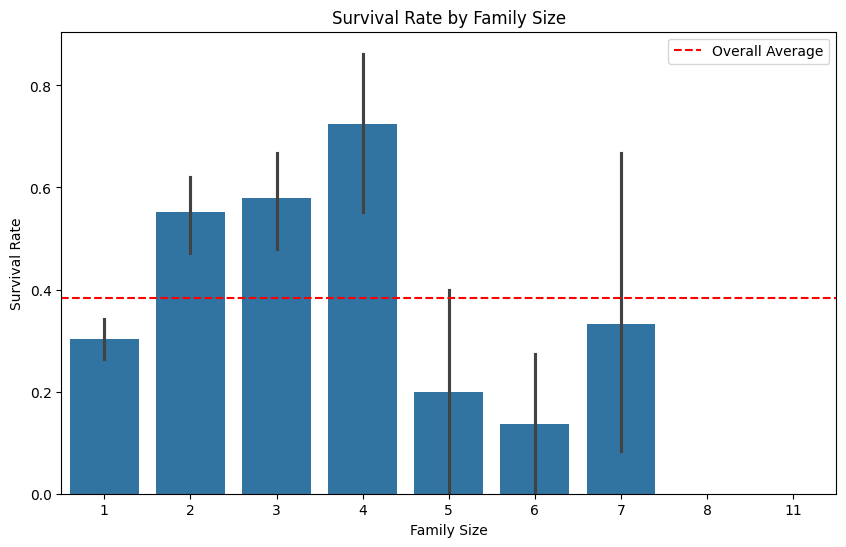

In [26]:
"""
注意到Parch（同行人个数，不包括子女和父母）
SibSp(同行的亲属个数，包括子女和父母)
这两个特征没用到。
既然这两个特征都和乘船人同行，那么我们可以组合成一个新的特征FamilySize。
既然组合新特征，那么我们看看组合出来的新特征是否能更好的分辨出存活性
"""
titanic['FamilySize'] = titanic['SibSp']+titanic['Parch']+1
plt.figure(figsize=(10, 6))
sns.barplot(x=titanic['FamilySize'], y=titanic['Survived'], data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

#axhline是添加一个水平线，值为生存率的平均值
plt.axhline(y=titanic['Survived'].mean(), color='r', linestyle='--', label='Overall Average')
#legend()是显示图例
plt.legend()
plt.show()

<Axes: xlabel='isAlone', ylabel='Survived'>

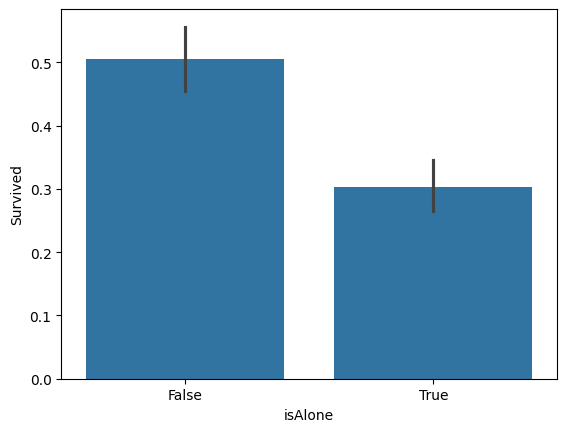

In [27]:
"""
从上面我们可以看到，一个人的生存率偏低，2到4人的生存率偏高，然后再到后来又偏低
因此家庭规模是一个很棒的特征
我们可以考虑这个人是否独行，分析后来看看这个特征如何
"""
titanic['isAlone'] = titanic['FamilySize'] == 1
sns.barplot(data=titanic,x=titanic['isAlone'],y=titanic['Survived'])

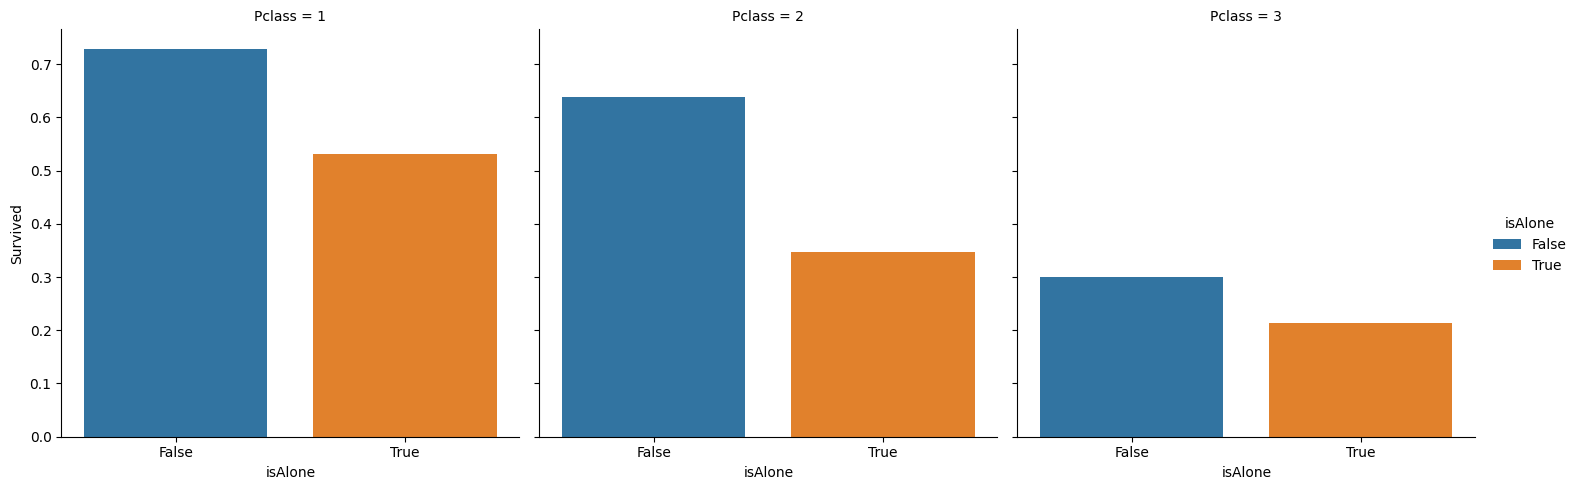

In [28]:
"""
非独行侠在生存率这一与独行侠没多少优势，但不能说这个特征就没用
我们可以看看它和船舱等级的情况，也许穷人没有钱，但他们可以抱团取暖
"""
#比率直方图，与countplot不同的是，这个y轴是比率
sns.catplot(x='isAlone', y='Survived', col='Pclass', 
            data=titanic, kind='bar', errorbar=None, hue='isAlone')
plt.show()

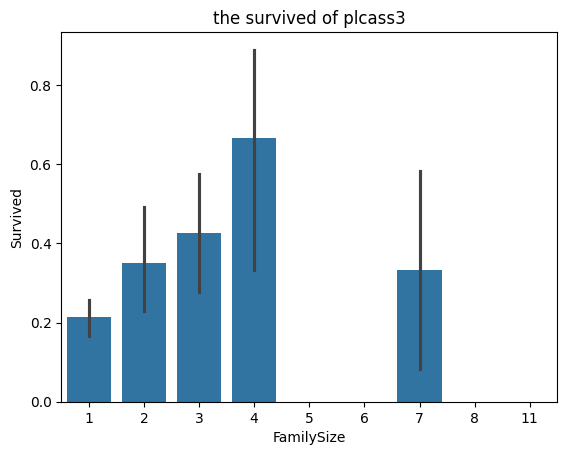

In [29]:
"""
从上面可以看出，一等座无论是不是独行侠，生存率都很高（有钱必然会被先救）
二等座中，非独行侠存活率要远高于独行侠，因此独行侠特征对于二等座是很好的特征，但这个局限性就高了，因为它只针对二等座
三等坐中，无论是不是独行侠，存活率都很低，因此这个独行侠对于判断存活率来说，其实不是特别好，不过还是留着吧，说不定以后要用
"""

"""
那么，我们不再局限于看独行侠，而是回过头去看家庭规模对于三等座中存活率的影响
"""
titanic_p3 = titanic[titanic['Pclass'] == 3]
sns.barplot(data=titanic_p3,x='FamilySize',y='Survived')
plt.title('the survived of plcass3')
#顺带一提，我们有了家庭规模，那么SibSp和Parch数据可以丢了
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)

<Axes: xlabel='FamilySizeCategory', ylabel='Survived'>

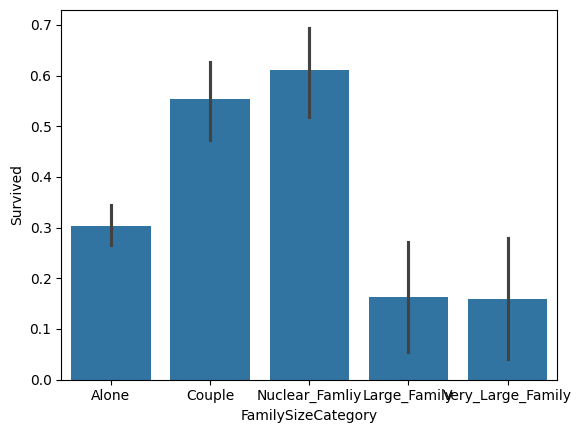

In [30]:
"""
我们通过对家庭规模分析得出，家庭规模和存活率并不是一个线性的关系（这一点和年龄的情况一样）
所以，对于一个非线性的特征最好的做法就是分箱
"""
def func(size):
    if size == 1:
        return 'Alone'
    elif size == 2:
        return 'Couple'
    elif 3<=size<=4:
        return 'Nuclear_Famliy'
    elif 5<=size<=6:
        return 'Large_Family'
    else:
        return 'Very_Large_Family'

titanic['FamilySizeCategory'] = titanic['FamilySize'].apply(func)

#来看看分箱后的情况
sns.barplot(x='FamilySizeCategory',y='Survived',data=titanic,order=['Alone','Couple','Nuclear_Famliy','Large_Family','Very_Large_Family'])

<Axes: xlabel='FamilySizeCategory', ylabel='Survived'>

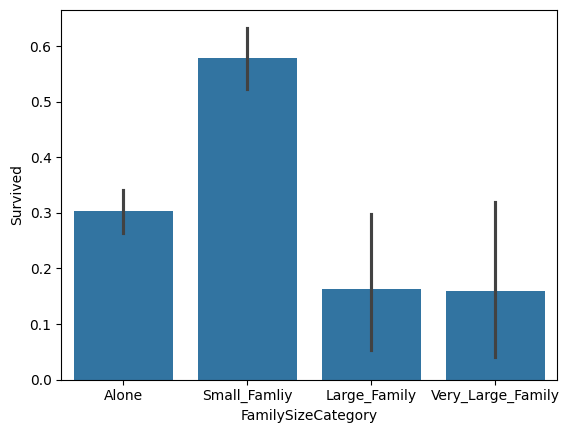

In [31]:
"""
发现couple也不低，那么我们尽量避免那些杂音，可以把2~4看作核心体进行融合改进
"""

def func(size):
    if size == 1:
        return 'Alone'
    elif 2<=size<=4:
        return 'Small_Famliy'
    elif 5<=size<=6:
        return 'Large_Family'
    else:
        return 'Very_Large_Family'

titanic['FamilySizeCategory'] = titanic['FamilySize'].apply(func)
sns.barplot(x='FamilySizeCategory',y='Survived',data=titanic,order=['Alone','Small_Famliy','Large_Family','Very_Large_Family'])

In [32]:
"""
因此继“年龄段”，“HasCabin”之后我们创建了第三个特征工程“FamilySizeCategory”
这里再讲一下什么时候我们要进行数据分箱？
像是年龄与存活率的关系，家庭规模与存活率的关系。都是非线性的（存活率并不是随着家庭规模的增大而增大或者增大而减小），因此最好将非线性的给它进行分箱。
比如年龄——>年龄段。家庭规模——>家庭规模种类
在决定是否继续看家庭规模还是往后走的时候，继续看看Info，来看看哪些还没看，哪些可以删
"""
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Survived            891 non-null    int64   
 1   Pclass              891 non-null    int64   
 2   Name                891 non-null    object  
 3   Sex                 891 non-null    object  
 4   Age                 891 non-null    float64 
 5   Ticket              891 non-null    object  
 6   Fare                891 non-null    float64 
 7   Cabin               204 non-null    object  
 8   Embarked            891 non-null    object  
 9   AgeGroup            891 non-null    category
 10  isChild             891 non-null    int64   
 11  Title               891 non-null    object  
 12  HasCabin            891 non-null    bool    
 13  FamilySize          891 non-null    int64   
 14  isAlone             891 non-null    bool    
 15  FamilySizeCategory  891 non-null    obje

Text(0.5, 1.0, 'the FamilySize Vs Fare')

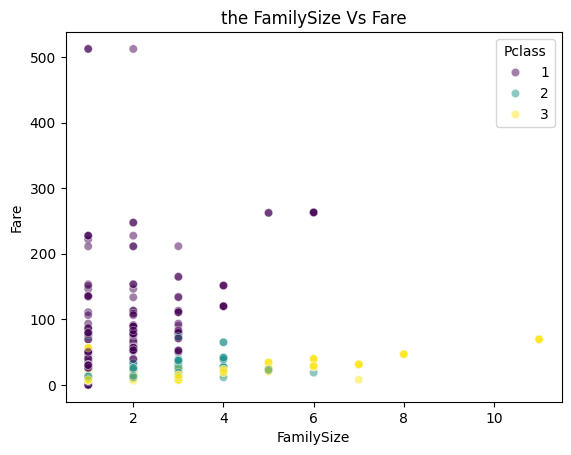

In [33]:
"""
那么接下来就到Fare的情况了，我们要看看Fare究竟是一家人的总票价还是每个人专属的票价
"""
sns.scatterplot(x='FamilySize',y='Fare',data = titanic,alpha=0.5, hue='Pclass', palette='viridis')
plt.title("the FamilySize Vs Fare")

In [34]:
"""
从上面可以看出，Fare如果是人均票价，那么不会有什么同一个Pclass的人，不同的家庭规模仍然在一个相同的水平线。
因此可以看出Fare是总票价，比如一个4人家庭买了一个一等舱200的船票，那么它和一个富豪买了一等舱200的Fare是一样的
但我们之前判定的是，一个人越富有那么他的生存概率越高，因此Fare并不能直观反应这个人是否富有，就像我说的
一个家庭拿出200买一等票肯定没有一个富豪花200买一等票富有啊。
那么为了消除这个Fare的噪音，我们进行的EDA就是将它变成人均票价
"""
titanic['FarePerPerson'] = titanic['Fare']/titanic['FamilySize']
titanic['FarePerPerson'] = titanic['FarePerPerson'].astype(float)
print(titanic['FarePerPerson'].describe())

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: FarePerPerson, dtype: float64


<Axes: xlabel='FarePerPerson', ylabel='Count'>

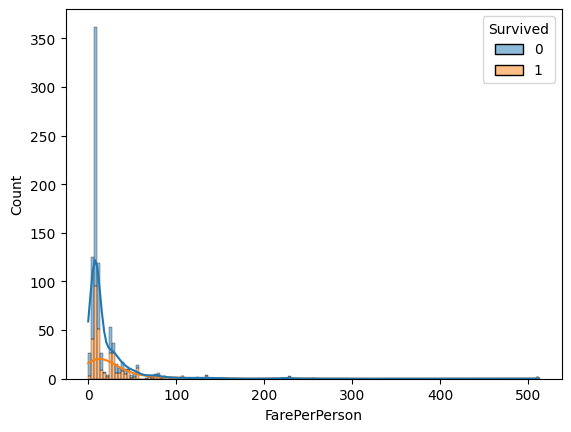

In [35]:
"""
那么，我们开始对人均票价的平均生存率来看看是什么情况
由于计算出来的平均票价是连续值，所以不再推荐用barplot绘制，选择之前年龄所用的histplot来绘制
"""
sns.histplot(data=titanic, x='FarePerPerson', hue='Survived', multiple='stack', kde=True)

(0.0, 100.0)

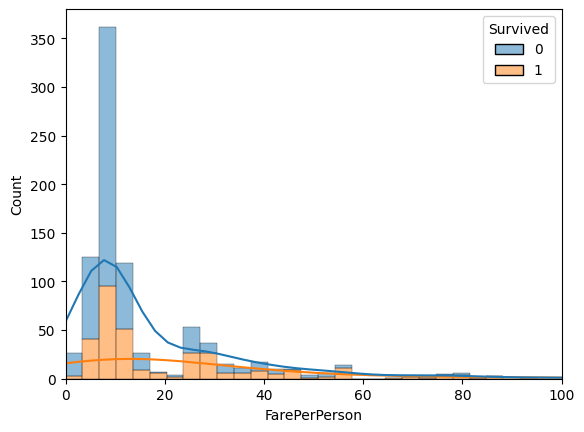

In [36]:
"""
注意到大部分数据都集中在0-100，只有那么几个少量且大的数据把整个图拉小了。
解决方法很简单，要么只看0-100，忽略那些大数据
要么用箱线图
那么，先看看限制把
"""
sns.histplot(data=titanic,x='FarePerPerson',hue='Survived',multiple='stack',kde=True)
plt.xlim(0,100)

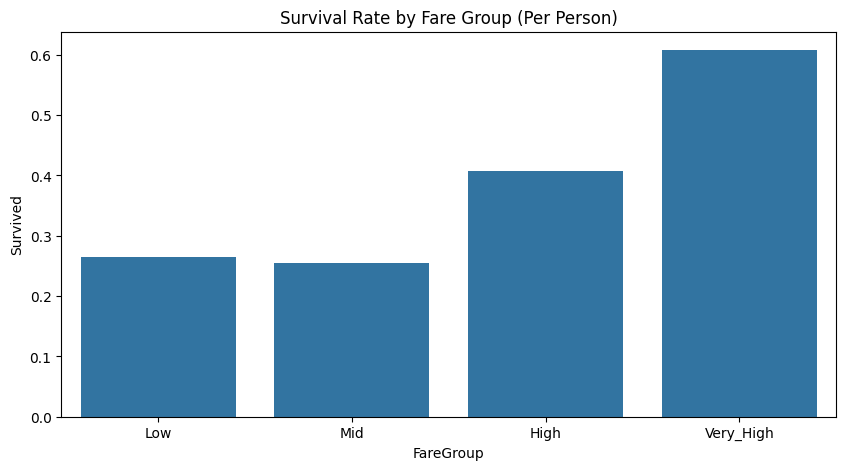

In [37]:
"""
可以看出FarePerPerson和Survived明显不是线性关系，所以我们考虑分箱
"""
titanic['FareGroup'] = pd.qcut(titanic['FarePerPerson'], 4, labels=['Low', 'Mid', 'High', 'Very_High'])

# 立即可视化，查看分箱效果
plt.figure(figsize=(10, 5))
sns.barplot(x='FareGroup', y='Survived', data=titanic, order=['Low', 'Mid', 'High', 'Very_High'],errorbar=None)
plt.title('Survival Rate by Fare Group (Per Person)')
plt.show()

<Axes: xlabel='FareGroup_Optimized', ylabel='Survived'>

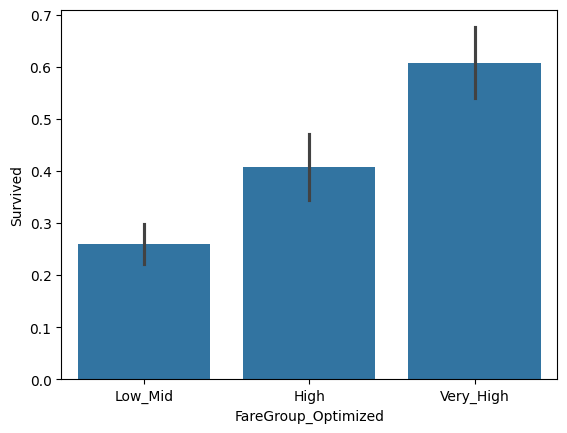

In [38]:
"""
不建议合并High和Very_High，仔细观察Low和Mid到Very_High形成了一个线性关系（表明越有钱存活率越高）
但是Low和Mid中Mid导致了一些非线性，那么我们尝试看看合并这两个，让它变成中低阶层
"""
def func(fare_group):
    if fare_group in ['Low','Mid']:
        return 'Low_Mid'
    else:return fare_group

titanic['FareGroup_Optimized'] = titanic['FareGroup'].apply(func)
sns.barplot(x='FareGroup_Optimized',y='Survived',data=titanic,order=['Low_Mid','High','Very_High'])

In [39]:
"""
已成功实现抽象出该特征，发现是一个强大的线性关系，它反映出钱越多，存活率越高
如今的EDA工程已经抽象出目前我觉得最好的几个特征"AgeGroup","HasCabin","FareGroup_OPtimized","FamilySizeCategory"
"""
#把之前的老特征删除
titanic.drop('FareGroup',axis=1,inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Survived             891 non-null    int64   
 1   Pclass               891 non-null    int64   
 2   Name                 891 non-null    object  
 3   Sex                  891 non-null    object  
 4   Age                  891 non-null    float64 
 5   Ticket               891 non-null    object  
 6   Fare                 891 non-null    float64 
 7   Cabin                204 non-null    object  
 8   Embarked             891 non-null    object  
 9   AgeGroup             891 non-null    category
 10  isChild              891 non-null    int64   
 11  Title                891 non-null    object  
 12  HasCabin             891 non-null    bool    
 13  FamilySize           891 non-null    int64   
 14  isAlone              891 non-null    bool    
 15  FamilySizeCategory   89

In [40]:
"""
特征工程过后如今的情况：
标识特征：Name, Ticket, Cabin (原始)。这些是ID类信息，可以丢弃。
原始特征：Pclass, Sex, Age, Fare, Embarked, SibSp, Parch。这些是建模的基础。
工程特征（我的核心成果）：
AgeGroup 和 isChild -> (从Age衍生)
Title -> (从Name衍生)
HasCabin -> (从Cabin衍生)
FamilySize -> (从SibSp, Parch衍生)
isAlone -> (从FamilySize衍生)
FamilySizeCategory -> (从FamilySize衍生，是isAlone的终极进化版)
FarePerPerson -> (从Fare, FamilySize衍生)
FareGroup_Optimized -> (从FarePerPerson衍生)
"""

"""
进行最后的清洗，发现一些特征可以丢弃了，比如Name,Ticket,isChild,FamilySize,isAlone，FarePerPerson
"""

titanic.drop('Name',axis=1,inplace=True)
titanic.drop('Ticket',axis=1,inplace=True)
titanic.drop('isChild',axis=1,inplace=True)
titanic.drop('FamilySize',axis=1,inplace=True)
titanic.drop('isAlone',axis=1,inplace=True)
titanic.drop('FarePerPerson',axis=1,inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Survived             891 non-null    int64   
 1   Pclass               891 non-null    int64   
 2   Sex                  891 non-null    object  
 3   Age                  891 non-null    float64 
 4   Fare                 891 non-null    float64 
 5   Cabin                204 non-null    object  
 6   Embarked             891 non-null    object  
 7   AgeGroup             891 non-null    category
 8   Title                891 non-null    object  
 9   HasCabin             891 non-null    bool    
 10  FamilySizeCategory   891 non-null    object  
 11  FareGroup_Optimized  891 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(2), object(6)
memory usage: 71.7+ KB


In [41]:
"""
接下来开始数据预处理，之前我们根据训练集的数据做出了特征工程，现在我们要对测试集预测
那么我们的测试集也要进行和测试集一样的做法
"""
test_df = pd.read_csv('./data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [43]:
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.',expand=False)
print(test_df['Title'].value_counts())

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [44]:
title_mapping = {
    'Mlle': 'Miss',    # Mlle（法语小姐） -> Miss
    'Ms': 'Miss',
    'Lady': 'Mrs',     # 贵族妇女 -> Mrs
    'Countess': 'Mrs',
    'Dona': 'Mrs',
    'Mme': 'Mrs',      # Mme（法语夫人） -> Mrs
    'Capt': 'Mr',      # 船长 -> Mr
    'Col': 'Mr',       # 上校 -> Mr
    'Don': 'Mr',       # 先生（西班牙语） -> Mr
    'Dr': 'Mr',        
    'Jonkheer': 'Mr',  # 荷兰贵族 -> Mr
    'Major': 'Mr',
    'Rev': 'Mr',       # 牧师 -> Mr
    'Sir': 'Mr'
}
#启用映射，将那些小众称呼映射到一起
test_df['Title'] = test_df['Title'].map(title_mapping).fillna(test_df['Title'])
#用fillna是为了确保那些没在映射表中的头衔（如Master，Mr）保持不变

print(test_df['Title'].value_counts())

Title
Mr        245
Miss       79
Mrs        73
Master     21
Name: count, dtype: int64


In [45]:
#用之前写好的函数来填充Age
test_df['Age'] = test_df.apply(fill_age,axis=1)
#进行年龄分箱
test_df['AgeGroup'] = pd.cut(test_df['Age'],bins=[0,12,18,35,60,100])
print(test_df['Age'].isnull().sum())

0


In [46]:
#创建HasCabin
test_df['HasCabin'] = test_df['Cabin'].notnull()

#创建FamilySize
test_df['FamilySize'] = test_df['SibSp']+test_df['Parch']+1

#利用FamilySize创建FamilySizeCategory
def FCategory(size):
    if size == 1:
        return 'Alone'
    elif 2<=size<=4:
        return 'Small_Famliy'
    elif 5<=size<=6:
        return 'Large_Family'
    else:
        return 'Very_Large_Family'

test_df['FamilySizeCategory'] = test_df['FamilySize'].apply(FCategory)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 418 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               91 non-null     object  
 10  Embarked            418 non-null    object  
 11  Title               418 non-null    object  
 12  AgeGroup            418 non-null    category
 13  HasCabin            418 non-null    bool    
 14  FamilySize          418 non-null    int64   
 15  FamilySizeCategory  418 non-null    obje

In [48]:
"""
开始分离平均票价分箱
但是我们发现test_df中，Fare有一个空值，所以必须先填充好Fare再来计算FarePerPerson
否则我们的特征工程建立出来的新特征工程会有一个空值，那时更不好弄

注意！测试集缺失值必须用训练集计算的结果来填充，不能用测试集的计算结果来填充，否则会有数据泄露
"""
# 找到Fare为NaN的行
fare_null_passenger = test_df[test_df['Fare'].isnull()]
print("\n缺失Fare的乘客信息:")
print(fare_null_passenger[['PassengerId', 'Pclass']])

#用训练集计算出各个舱门的平均数
fare_median_by_pclass = titanic.groupby('Pclass')['Fare'].median()
print("\n训练集中各舱位票价中位数:")
print(fare_median_by_pclass)

#发现缺失值是发生在3等舱
test_df['Fare'].fillna(fare_median_by_pclass[3], inplace=True) 


缺失Fare的乘客信息:
     PassengerId  Pclass
152         1044       3

训练集中各舱位票价中位数:
Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64


C:\Users\汪博艺\AppData\Local\Temp\ipykernel_9112\920948885.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(fare_median_by_pclass[3], inplace=True)


In [49]:
test_df['FarePerPerson'] = test_df['Fare']/test_df['FamilySize']
test_df['FarePerPerson'] = test_df['FarePerPerson'].astype(float)

#分箱
test_df['FareGroup'] = pd.qcut(test_df['FarePerPerson'],4,labels=['Low','Mid','High','Very_High'])


def func(fare_group):
    if fare_group in ['Low','Mid']:
        return 'Low_Mid'
    else:return fare_group

test_df['FareGroup_Optimized'] = test_df['FareGroup'].apply(func)
test_df.drop('FareGroup',axis=1,inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  418 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 418 non-null    float64 
 9   Cabin                91 non-null     object  
 10  Embarked             418 non-null    object  
 11  Title                418 non-null    object  
 12  AgeGroup             418 non-null    category
 13  HasCabin             418 non-null    bool    
 14  FamilySize           418 non-null    int64   
 15  FamilySizeCategory   41

In [50]:
test_df.drop('Name',axis=1,inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)
test_df.drop('FamilySize',axis=1,inplace=True)
test_df.drop('FarePerPerson',axis=1,inplace=True)
test_df.drop('SibSp',axis=1,inplace=True)
test_df.drop('Parch',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)
titanic.drop('Cabin',axis=1,inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Sex                  418 non-null    object  
 3   Age                  418 non-null    float64 
 4   Fare                 418 non-null    float64 
 5   Embarked             418 non-null    object  
 6   Title                418 non-null    object  
 7   AgeGroup             418 non-null    category
 8   HasCabin             418 non-null    bool    
 9   FamilySizeCategory   418 non-null    object  
 10  FareGroup_Optimized  418 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(2), object(5)
memory usage: 30.6+ KB


In [51]:
"""
现在开始模型训练和预测，之后提交到kaggle
先分离好训练集和测试集
"""
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
            'AgeGroup', 'HasCabin', 'FamilySizeCategory', 'FareGroup_Optimized']

X_train = titanic[features]
y_train = titanic['Survived']

X_test = test_df[features]

"""
投入模型之前一定一定要再看看数据是否真正清洗完了！
"""
print('X_train')
X_train.info()
print('X_test')
X_test.info()

X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pclass               891 non-null    int64   
 1   Sex                  891 non-null    object  
 2   Age                  891 non-null    float64 
 3   Fare                 891 non-null    float64 
 4   Embarked             891 non-null    object  
 5   Title                891 non-null    object  
 6   AgeGroup             891 non-null    category
 7   HasCabin             891 non-null    bool    
 8   FamilySizeCategory   891 non-null    object  
 9   FareGroup_Optimized  891 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(1), object(5)
memory usage: 57.8+ KB
X_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               -

In [52]:
"""
但是现在有一个知识需要补充。
模型是无法直接处理文本的，因为机器它并不知道这个文本的意思，它只知道数字
因此像是Title,Sex,FamilySizeCategory,FareGroup_Optimized,Embarked这些特征，不能直接放入模型中
而是需要进行热处理才行，所谓热处理就是如下：
Original	Embarked_S	Embarked_C	Embarked_Q
S	1	0	0
C	0	1	0
Q	0	0	1

注意，不要觉得这个让一个Emabarked这么一个特征变成Embarked_S,Embarked_C,Embarked_Q变复杂了，不如让S=0,Q=1,C=2
这样的话模型会错误地认为这些数字之间有数学关系，从而得出荒谬的结论，比如：
“Q (2) 比 C (1) 大”
“C (1) 和 S (0) 的差值，与 Q (2) 和 C (1) 的差值相同”
这显然是不符合事实的。S, C, Q 只是三个平等的类别。
"""

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#写出要进行独热编码的特征
categorical_features=['Sex','Embarked','Title','AgeGroup',
                      'FamilySizeCategory','FareGroup_Optimized']

#开始进行热处理，后继代码我会说明
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train) # 在训练集上拟合并转换
X_test_encoded = preprocessor.transform(X_test)       # 在测试集上直接转换

"""
首先，ColumnTransformer:这是一个转换器库函数
transformers:这是一个规则数组，内部又一个个元组组成
cat:转换器的名称(自己取)
OneHotEncoder(参数):这是调用热处理器的意思
handel_unknown='ignore':对于训练集中出现测试集中未出现的特征，采用设置为0处理
categorical_features：使用的特征集是categorical_features数组记录的特征集
remainder='passthrough':对于不是特征集categorical_features里的特征时，采取跳过处理
最后用preprocessor接受这个转换器

如果你使用了独热转换，那么你在训练数据的时候必须使用preprocessor.fit_transform(X_train)
fit_transform就是与fit()和transform()的结合，fit则是训练模型，transform则是用那些独热数据投入模型中，比如把一些文本转为独热数据
而对于预测集则是用transform来进行转换，仅仅只是转换，后继我们再根据转换的独热数据，进行prediction
"""
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Sex                  418 non-null    object  
 3   Age                  418 non-null    float64 
 4   Fare                 418 non-null    float64 
 5   Embarked             418 non-null    object  
 6   Title                418 non-null    object  
 7   AgeGroup             418 non-null    category
 8   HasCabin             418 non-null    bool    
 9   FamilySizeCategory   418 non-null    object  
 10  FareGroup_Optimized  418 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(2), object(5)
memory usage: 30.6+ KB


In [53]:
"""
开始进行三个模型预测，到时候我们选择预测结果最好的那个模型调参就行
模型一：逻辑回归
模型二：支持向量机
模型三：随机森林
"""

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models={
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
    'SVM':SVC(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42)
}

#创建字典存储里面存放我们要交的预测test_y和一个训练准确率
reslut = {}

for name,model in models.items():
    #训练模型
    model.fit(X_train_encoded,y_train)

    #看看训练集的准确率
    train_preds = model.predict(X_train_encoded)
    train_accuracy = accuracy_score(y_train,train_preds)

    #收集测试集的预测数据
    test_preds = model.predict(X_test_encoded)

    #收集数据
    reslut[name] = {
        'test_predictions':test_preds,
        'train_accuracy':train_accuracy
    }

    #打印结果
    print(f"{name:20} | Train Accuracy: {train_accuracy:.4f}")


Logistic Regression  | Train Accuracy: 0.8316
SVM                  | Train Accuracy: 0.6869
Random Forest        | Train Accuracy: 0.9832


In [58]:
"""
很显然，随机森林的训练准确率是最高的，我们要看看随机森林是否过拟合
我们生成一个随机森林的提交文件，提交给kaggle看看是真的很好还是过拟合了
kaggle上的分数是0.76，显然随机森林过拟合了，不过我们目标是找到预测模型最好的那个，一个个来调参
"""
rf_predictions = reslut['Random Forest']['test_predictions']
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':rf_predictions
})
print(submission)
submission.to_csv('random_forest_submission.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [59]:
"""
现在看看逻辑回归模型如何
kaggle得分0.7694
"""
rf_predictions = reslut['Logistic Regression']['test_predictions']
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':rf_predictions
})
print(submission)
submission.to_csv('logistic_regression_submission.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [60]:
"""
再来看看向量机的情况
"""
rf_predictions = reslut['SVM']['test_predictions']
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':rf_predictions
})
print(submission)
submission.to_csv('svm_submission.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [63]:
"""
现在发现最好的是逻辑回归（随机森林可能是个潜力股，不过后面再说，毕竟那个东西我们要学习如何解决过拟合）
所以针对逻辑回归，我们按照计划来进行交叉验证和调参来优化这个模型
"""

"""
什么是交叉验证？
想象你正在为学生时代的一场大考做准备。你有一本习题集（训练集）。
错误方法（一次分割）：你把习题集的前80%做了，然后直接用后20%来测试得分。风险：如果后20%的题恰好都是你擅长的，你会得到一个
                      虚高的分数，误以为自己准备好了，结果真正大考时惨败。
正确方法（交叉验证）：你进行5次模拟考。
第一次：用第1、2、3、4章训练，用第5章测试。
第二次：用第1、2、3、5章训练，用第4章测试。
第三次：用第1、2、4、5章训练，用第3章测试。
...如此循环5次，确保每一章都当过一次“测试集”。
最终成绩：你取5次模拟考的平均分。这个分数极其稳健，能真实反映你对整个习题集的掌握程度，不会因为某一次考试的题目偏好而失真。

交叉验证的作用：
1.让数据充分利用，每一个数据都是“训练官”和“考官”
2.在不触碰最终的测试集结果的情况下，利用训练集跑出与测试集大差不差的结果预测
3.得到更稳健的评估：一次分割可能运气好得到虚高的分，经过交叉验证会得到更好的分数
"""

from sklearn.model_selection import cross_val_score

#初始化一个新的逻辑回归对象
lr_model=LogisticRegression(max_iter=1000,random_state=42)

#进行5折交叉验证，评估指标为准确率
cv_scores = cross_val_score(lr_model, X_train_encoded, y_train, cv=5, scoring='accuracy')

# 打印每次交叉验证的分数及平均分数
print("交叉验证准确率 scores:", [f"{score:.4f}" for score in cv_scores])
print(f"平均交叉验证准确率: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

交叉验证准确率 scores: ['0.8380', '0.8202', '0.8034', '0.8202', '0.8764']
平均交叉验证准确率: 0.8316 (+/- 0.0498)


In [67]:
"""
发现交叉验证出来的逻辑回归都挺好的，代表它本来就是这个能力的预测强度，只是我们在没优化就丢给kaggle了，所以分数有些偏低
那么回忆一下，如何优化模型，使得它既不会过拟合又不会欠拟合？
1. 选择几个重要的特征（我们已完成）
2. 建立特征工程（我们已完成）
3. 正则化（这是我们接下来要解决的,也是我们常说的调参的地方）

我们这里的调参就是找一个正则化强度C，找到最好的那个正则化强度的模型，运用这个优化后的模型来预测数据
我们使用GridSearchCV（网格搜索交叉验证）来找到这个参数C
网络搜索交叉验证，会根据你提供的网格数据[0.01,0.1,1,10,100]来挨个进行交叉验证，找到最好的那个正则强度C
"""

from sklearn.model_selection import GridSearchCV

#定义网格数据参数
param_grid={
    'C':[0.001,0.01,0.1,1,10,100],
}

"""
首先获取网络搜索交叉验证把它传给grid_search，它将是后面用于训练的模型
grid_search这个模型是一个逻辑回归模型经过5折正则化出结果的模型
之后它会在正则化里找那个最出色的逻辑回归模型，评分标准是准度
"""
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1
                          )

#训练数据上执行网络搜索
grid_search.fit(X_train_encoded,y_train)

# 输出最佳参数和最佳分数
print(f"\n最佳参数: {grid_search.best_params_}")
print(f"最佳交叉验证分数: {grid_search.best_score_:.4f}")

# 获取最佳模型
best_lr_model = grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits

最佳参数: {'C': 1}
最佳交叉验证分数: 0.8316


In [68]:
"""
C=1,这是之前逻辑回归的默认参数，也就是调了半天什么都没变！
不过既然我们进行了交叉验证，我们来生成文件然后提交kaggle看看吧
进行最终预测来看看
"""
final_predictions = best_lr_model.predict(X_test_encoded)

# 生成提交文件
final_submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_predictions
})

# 保存文件
final_submission.to_csv('optimized_lr_submission.csv', index=False)
print("优化后的提交文件 'optimized_lr_submission.csv' 已生成！")

优化后的提交文件 'optimized_lr_submission.csv' 已生成！


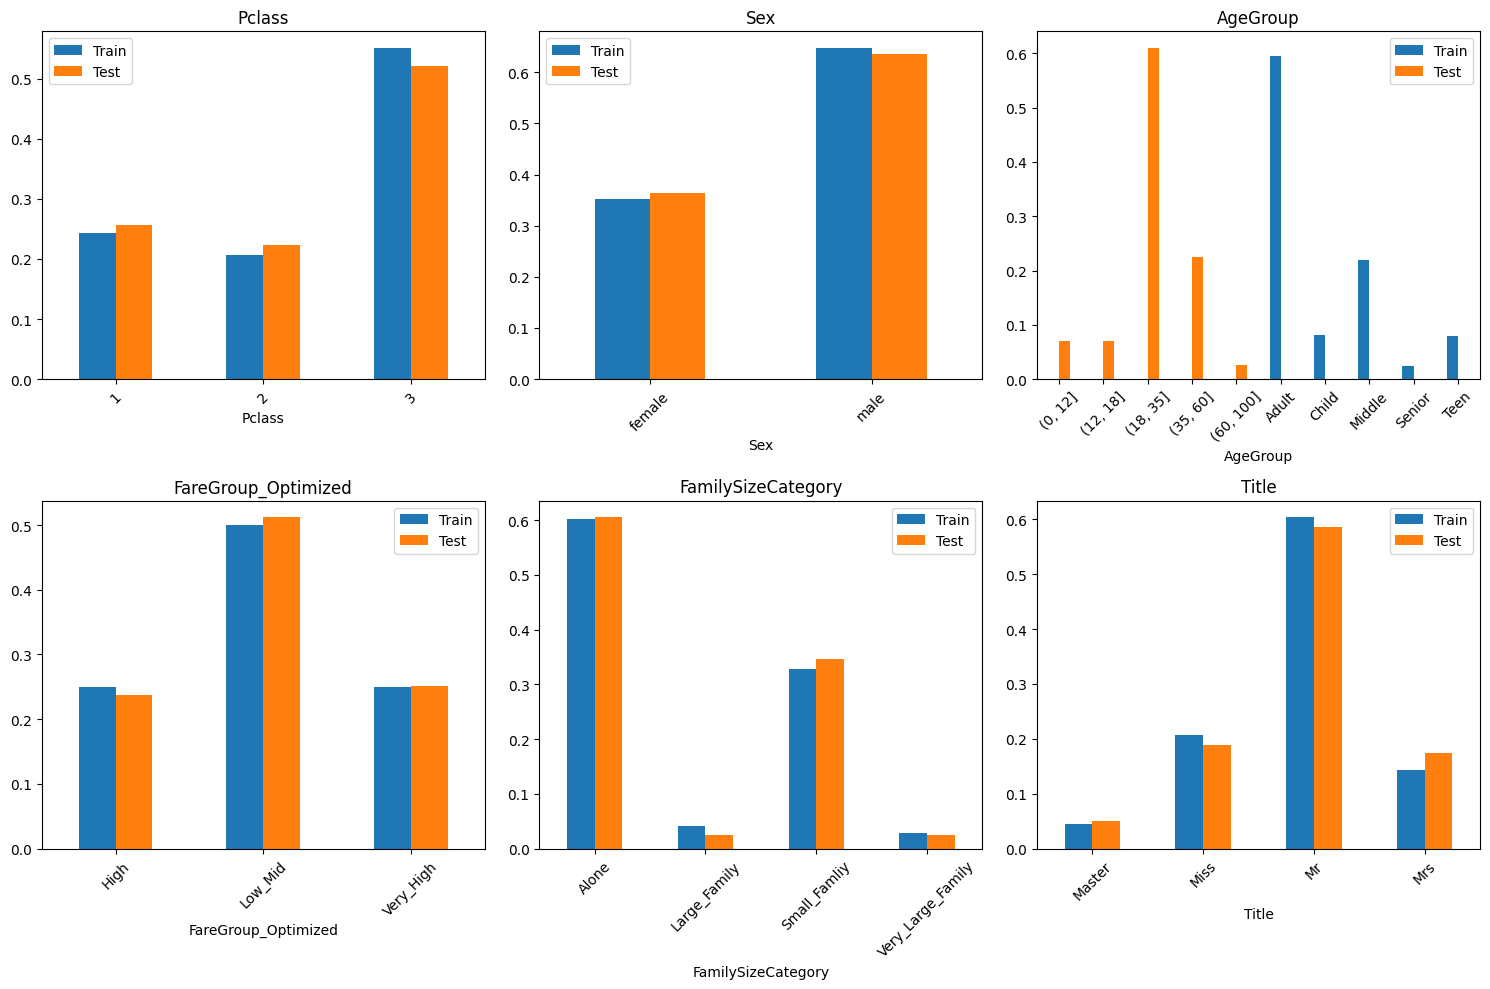

In [69]:
"""
仍让没变，但进行交叉验证后的模型却和提交的测试集的数据相差巨大！这要看看是不是数据分布不一致！
"""
# 1. 为数据集添加一个来源标记
titanic['Dataset'] = 'Train'
test_df['Dataset'] = 'Test'

# 2. 合并两个数据集以便比较
combined_df = pd.concat([titanic, test_df], ignore_index=True)

# 3. 选择几个关键特征进行比较
key_features = ['Pclass', 'Sex', 'AgeGroup', 'FareGroup_Optimized', 'FamilySizeCategory', 'Title']

# 4. 绘制比较图
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    # 计算比例
    train_props = titanic[feature].value_counts(normalize=True).sort_index()
    test_props = test_df[feature].value_counts(normalize=True).sort_index()
    
    # 创建 DataFrame 用于绘图
    plot_df = pd.DataFrame({'Train': train_props, 'Test': test_props})
    plot_df.plot(kind='bar', ax=axes[i], title=feature)
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [72]:
"""
那么从上述可以看出整体的特征分布数据都是几乎一模一样的，也就是没什么可改进的了
要么试试其它模型比如决策树，要么再一次回到特征工程里继续进行EDA，但是我也没那时间了
我们试试最后的几步吧，自己调整逻辑回归的参数

提高了！现在kaggle得分从原来的0.76794提升到了0.779！
"""
lr_small = LogisticRegression(C=0.1,max_iter=1000, random_state=42)
lr_small.fit(X_train_encoded,y_train)
final_predictions = lr_small.predict(X_test_encoded)
final_submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':final_predictions
})

final_submission.to_csv('small_lr_submission.csv',index=False)


In [74]:
"""
我们这次再试试0.01的参数
"""
lr_small = LogisticRegression(C=0.05,max_iter=1000, random_state=42)
lr_small.fit(X_train_encoded,y_train)
final_predictions = lr_small.predict(X_test_encoded)
final_submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':final_predictions
})

final_submission.to_csv('very_small_lr_submission.csv',index=False)